In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Будем визулизировать данные этой библиотекой
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

In [2]:
import re
from tabulate import tabulate

In [3]:
pd.set_option("display.max_columns", 100)

## Загрузка баз для балансировки

In [8]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df1_cutted.scv'
df1 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df1.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.00,RUB,КредитнаяКарта,Активный,8/22/2039,NaN,0.000,141531.65,0.0,0.0,NaN,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.00,1/15/2015,NaN,ПоОсновномуДолгу,140070.97,False,0
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.00,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,NaN,0.000,268860.28,0.0,0.0,NaN,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,3240.15,6/18/2018,NaN,ПоОсновномуДолгу,168000.00,False,0
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,NaN,40.998,39779.33,0.0,0.0,NaN,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.00,12/17/2015,NaN,ПоОсновномуДолгу,29356.04,False,0


In [9]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df2_cutted.scv'
df2 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df2.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,7/16/2018,69325,RUB,КредитнаяКарта,Просрочен,NaN,NaN,0,0,0.0,0.0,240 и более,0.0,1/31/1900,10/11/2022,0,0.0,0.0,69325,0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,69325,7/16/2018,NaN,ПоОсновномуДолгу,0,False,1
1,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,8/18/2014,"217308,26",RUB,КредитНаличнымиНецелевой,Просрочен,NaN,NaN,0,"694,59",0.0,0.0,150-179,0.0,10/21/2021,10/3/2022,0,0.0,0.0,"216613,67",0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,"216613,67",12/26/2021,NaN,ПоОсновномуДолгу,"694,59",False,1
2,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,3/27/2021,"1666,66",RUB,Микрокредит,СчетЗакрыт,9/23/2021,NaN,"349,92","1666,66",0.0,0.0,NaN,0.0,4/12/2021,4/13/2021,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,4/12/2021,NaN,ПоОсновномуДолгу,"1666,66",False,1


In [10]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df3_cutted.scv'
df3 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df3.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,2022-10-11,72509d02-4970-11ed-b80c-3cfdfed12971,3/2/2020,2000,RUB,Микрокредит,СчетЗакрыт,3/23/2020,NaN,0,2000,0.0,0.0,NaN,0.0,3/24/2020,3/24/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,3/24/2020,NaN,ПоОсновномуДолгу,2000,False,2
1,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,2022-10-11,72509d02-4970-11ed-b80c-3cfdfed12971,3/5/2020,3000,RUB,Микрокредит,СчетЗакрыт,3/26/2020,NaN,365,3000,0.0,0.0,NaN,0.0,3/24/2020,3/25/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,3/24/2020,NaN,ПоОсновномуДолгу,3000,False,2
2,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,2022-10-11,72509d02-4970-11ed-b80c-3cfdfed12971,4/2/2020,4000,RUB,Микрокредит,СчетЗакрыт,4/23/2020,NaN,361,4831,0.0,0.0,NaN,0.0,4/23/2020,4/23/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,4/23/2020,NaN,ПоОсновномуДолгу,4000,False,2


In [11]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df4_cutted.scv'
df4 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df4.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,001a8d7d-8ee4-11e7-80ba-b1d4fc2e9c48,5ea2c91f-4d46-11ed-b80c-3cfdfed12971,10/16/2022,NaN,Крым республика,г. Алушта,29963.0,7/22/1982,Мужской,Среднее,военнослужащий,2022-10-16,a9e07a5c-4d46-11ed-b80c-3cfdfed12971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,001eb691-c1fb-11e6-80b9-b10e998925b8,3656989e-4b07-11ed-b80c-3cfdfed12971,10/13/2022,NaN,Карелия республика,г. Кемь,11969.0,8/18/1984,Женский,Среднее,прочее,2022-10-13,9f70615d-4b07-11ed-b80c-3cfdfed12971,2/10/2015,87343,RUB,Потребительский,СчетЗакрыт,2/11/2019,NaN,0,0,0.0,0.0,NaN,0.0,12/10/2018,12/10/2018,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,"21293,61",12/10/2018,NaN,ПоОсновномуДолгу,0,False,3
2,001eb691-c1fb-11e6-80b9-b10e998925b8,3656989e-4b07-11ed-b80c-3cfdfed12971,10/13/2022,NaN,Карелия республика,г. Кемь,11969.0,8/18/1984,Женский,Среднее,прочее,2022-10-13,9f70615d-4b07-11ed-b80c-3cfdfed12971,8/3/2015,5279,RUB,Микрокредит,СчетЗакрыт,1/18/2016,NaN,0,7585,0.0,0.0,NaN,0.0,1/13/2016,1/16/2016,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,1/13/2016,NaN,ПоОсновномуДолгу,5279,False,3


In [12]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df6_cutted.scv'
df6 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df6.head(3)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,000353c0-352e-4704-ab71-1733c29e786b,e1d9a447-f860-11ed-b820-3cfdfed12dbc,Оффлайн,2023-05-22,2023-07-07,Томская область,г. Асино,24351.0,1963-04-03,Женский,Среднее,пенсионер,2023-05-22,868a5b7e-f862-11ed-b80d-3cfdfed12971,2019-09-05,4680.0,RUB,Потребительский,СчетЗакрыт,2020-09-11 00:00:00,1899-12-29,17.068,5072.41,0.0,0.0,NaN,0.0,2020-05-10,2020-05-10,0.0,0.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,1899-12-29,Банк,0.0,2020-05-10,1899-12-29,NaN,4680.0,0.0,1
1,000353c0-352e-4704-ab71-1733c29e786b,e1d9a447-f860-11ed-b820-3cfdfed12dbc,Оффлайн,2023-05-22,2023-07-07,Томская область,г. Асино,24351.0,1963-04-03,Женский,Среднее,пенсионер,2023-05-22,868a5b7e-f862-11ed-b80d-3cfdfed12971,2020-05-16,20200.0,RUB,Микрокредит,СчетЗакрыт,2020-11-16 00:00:00,1899-12-29,39.697,22635.10,0.0,0.0,NaN,0.0,2020-11-16,2020-11-16,0.0,0.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2020-11-16,1899-12-29,NaN,20200.0,0.0,1
2,000353c0-352e-4704-ab71-1733c29e786b,e1d9a447-f860-11ed-b820-3cfdfed12dbc,Оффлайн,2023-05-22,2023-07-07,Томская область,г. Асино,24351.0,1963-04-03,Женский,Среднее,пенсионер,2023-05-22,868a5b7e-f862-11ed-b80d-3cfdfed12971,2021-03-12,9999.0,RUB,Потребительский,Просрочен,2021-09-12 00:00:00,1899-12-29,30.961,1.00,0.0,0.0,NaN,0.0,2021-04-16,2023-04-26,0.0,0.0,3540.0,9999.0,961.95,0.0,0.0,NaN,0.0,1899-12-29,Банк,0.0,2023-04-26,2021-04-16,NaN,0.0,0.0,1


In [13]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df7_cutted.scv'
df7 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df7.head(3)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,002e3785-158f-4e02-b9f2-5d61823d1289,299ffb2b-65fb-11eb-b81d-3cfdfed12dbd,Оффлайн,2021-02-03,2022-09-19,Ивановская область,г. Тейково,33276.0,1958-12-10,Женский,СреднеТехническое,пенсионер,2021-02-03,40c4ff4b-65fb-11eb-80cc-f4034344a6bd,2021-01-15,11000.0,RUB,Микрокредит,Активный,2021-02-14 00:00:00,2021-02-14,365.000,0.0,12760.0,0.0,0,0.0,1900-01-02,2021-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2021-01-31,2021-01-15,NaN,0.0,0.0,2
1,002e3785-158f-4e02-b9f2-5d61823d1289,299ffb2b-65fb-11eb-b81d-3cfdfed12dbd,Оффлайн,2021-02-03,2022-09-19,Ивановская область,г. Тейково,33276.0,1958-12-10,Женский,СреднеТехническое,пенсионер,2021-02-03,40c4ff4b-65fb-11eb-80cc-f4034344a6bd,2015-03-21,28325.0,RUB,КредитнаяКарта,Активный,2020-03-31 00:00:00,2020-03-31,22.118,64300.0,22729.0,0.0,1111111111111111111111111111111111111111111111...,1692.0,2020-03-23,2021-02-01,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,NaN,0.0,1899-12-29,Банк,0.0,2021-01-28,2021-01-07,NaN,0.0,0.0,2
2,002e3785-158f-4e02-b9f2-5d61823d1289,299ffb2b-65fb-11eb-b81d-3cfdfed12dbd,Оффлайн,2021-02-03,2022-09-19,Ивановская область,г. Тейково,33276.0,1958-12-10,Женский,СреднеТехническое,пенсионер,2021-02-03,40c4ff4b-65fb-11eb-80cc-f4034344a6bd,2020-07-23,7000.0,RUB,Микрокредит,СчетЗакрыт,2020-08-22 00:00:00,2020-08-22,365.000,10353.0,0.0,0.0,111111X,0.0,2020-09-22,2021-01-29,0.0,0.0,0.0,0.0,0.0,0.0,44313.0,NaN,0.0,1899-12-29,МФО,0.0,2020-09-22,2021-01-22,NaN,0.0,0.0,2


In [14]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df8_cutted.scv'
df8 = pd.read_csv(path, low_memory=False)
# Добавление столбца метки класса 0
#df1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df8.head(3)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,000021eb-6304-424f-a3bf-2dea0e1e74ce,44139790-2c1f-11ed-b81f-3cfdfed12dbd,Оффлайн,2022-09-04,NaN,Вологодская область,г. Тотьма,9895.0,1990-05-13,Мужской,Среднее,рабочий,2022-09-04,c9023471-2c1f-11ed-b80c-3cfdfed12971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,00072aae-ad00-4427-b3a2-633c69462718,f3e7fcba-d604-11ed-b820-3cfdfed12dbc,Оффлайн,2023-04-08,NaN,Свердловская область,г. Ирбит,36668.0,1987-06-22,Женский,СреднеТехническое,пенсионер,2023-04-08,3a1ff26f-d605-11ed-b80d-3cfdfed12971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,000c15d5-9f48-4963-9c37-4e0e1f48a01f,ac560ff5-7b2e-11eb-b81d-3cfdfed12dbd,Оффлайн,2021-03-02,NaN,Белгородская область,г.Волоконовка,10936.0,1964-12-25,Женский,СреднеТехническое,пенсионер,2021-03-02,35233d57-7b2f-11eb-b807-3cfdfed12971,2021-01-15,48434.0,RUB,Микрокредит,Просрочен,2021-04-26 00:00:00,2021-04-26,365.0,11000.0,57568.0,21176.0,C1,12620.0,2021-02-26,2021-03-02,36032.0,360.0,0.0,11730.0,9446.0,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2021-02-26,2021-02-12,NaN,0.0,0.0,3


In [15]:
print ('Вывод второй базы')
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print()
print('Вывод третьей базы')
#print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)

Вывод второй базы
(241157, 46)
(34436, 46)
(6185, 46)
(53180, 46)

Вывод третьей базы
(815979, 47)
(420993, 47)
(632012, 47)


In [17]:
df_all_2 = pd.concat([df2, df3, df4, df6, df7, df8], ignore_index=True)
df_all_2.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class,mark_kind
0,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,7/16/2018,69325,RUB,КредитнаяКарта,Просрочен,NaN,NaN,0,0,0.0,0.0,240 и более,0.0,1/31/1900,10/11/2022,0,0.0,0.0,69325,0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,69325,7/16/2018,NaN,ПоОсновномуДолгу,0,False,1,NaN
1,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,8/18/2014,"217308,26",RUB,КредитНаличнымиНецелевой,Просрочен,NaN,NaN,0,"694,59",0.0,0.0,150-179,0.0,10/21/2021,10/3/2022,0,0.0,0.0,"216613,67",0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,"216613,67",12/26/2021,NaN,ПоОсновномуДолгу,"694,59",False,1,NaN
2,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,3/27/2021,"1666,66",RUB,Микрокредит,СчетЗакрыт,9/23/2021,NaN,"349,92","1666,66",0.0,0.0,NaN,0.0,4/12/2021,4/13/2021,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,4/12/2021,NaN,ПоОсновномуДолгу,"1666,66",False,1,NaN


In [18]:
df_all_2.shape

(1962785, 47)

In [19]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/1_class_new.csv'
df5 = pd.read_csv(path, low_memory=False, nrows=1721628)
# Добавление столбца метки класса 0
df5.insert (loc= len(df5.columns) , column='Client_class', value=0)
df5.head(3)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Client_class
0,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-10-18 00:00:00.000,25000.0,RUB,Микрокредит,Активный,2021-11-19 00:00:00.000,2021-11-19 00:00:00.000,200.75,0.0,29400.0,0.0,0,29400.0,1900-01-02 00:00:00.000,2021-10-19 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-10-18 00:00:00.000,2021-10-18 00:00:00.000,0.0,False,0
1,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2017-09-27 00:00:00.000,331710.0,RUB,Потребительский,СчетЗакрыт,2021-09-27 00:00:00.000,2021-09-27 00:00:00.000,19.00,474295.0,0.0,0.0,1111111111111111111111111111111111111111111111110,0.0,2021-09-27 00:00:00.000,2021-09-28 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,415008.0,0.0,0001-01-01 00:00:00.000,Банк,0.0,2021-09-27 00:00:00.000,2021-09-27 00:00:00.000,0.0,False,0
2,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-08-20 00:00:00.000,28840.0,RUB,Микрокредит,СчетЗакрыт,2021-09-01 00:00:00.000,2021-09-01 00:00:00.000,255.50,31263.0,0.0,0.0,10,0.0,2021-09-01 00:00:00.000,2021-09-02 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-09-01 00:00:00.000,2021-09-01 00:00:00.000,0.0,False,0


In [20]:
df_all_1 = pd.concat([df1, df5], ignore_index=True)
df_all_1.shape

(1962785, 47)

In [21]:
df = pd.concat ([df_all_1, df_all_2], ignore_index=True)

In [22]:
df.shape

(3925570, 47)

In [24]:
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class,mark_kind
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.0,RUB,КредитнаяКарта,Активный,8/22/2039,NaN,0.0,141531.65,0.0,0.0,NaN,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.0,1/15/2015,NaN,ПоОсновномуДолгу,140070.97,False,0,NaN
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.0,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,NaN,0.0,268860.28,0.0,0.0,NaN,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,3240.15,6/18/2018,NaN,ПоОсновномуДолгу,168000.0,False,0,NaN
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,NaN,40.998,39779.33,0.0,0.0,NaN,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.0,12/17/2015,NaN,ПоОсновномуДолгу,29356.04,False,0,NaN
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,11/13/2015,15620.0,RUB,Потребительский,СчетЗакрыт,11/14/2016,NaN,0.0,0.0,0.0,0.0,NaN,0.0,10/13/2016,10/13/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,1157.42,10/13/2016,NaN,ПоОсновномуДолгу,0.0,False,0,NaN
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/7/2015,32000.0,RUB,КредитнаяКарта,СчетЗакрыт,10/1/2021,NaN,29.768,186130.59,0.0,0.0,NaN,0.0,8/16/2021,10/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.0,10/1/2021,NaN,ПоОсновномуДолгу,128642.19,False,0,NaN


In [25]:
#Определяем столбцы для удаления

columns_to_drop = ['volume_commitment', 'type_debt', 'days_overdue', 'surety_period', 'mark_kind', 'period_interest','beginning_days_delinquency_counting', 'next_payment'] 
df = df.drop(columns_to_drop, axis=1)

# Выводим измененный DataFrame
print("\nDataFrame после удаления столбцов:")
df.head()



DataFrame после удаления столбцов:


,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.0,RUB,КредитнаяКарта,Активный,8/22/2039,0.0,141531.65,0.0,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,1/15/2015,140070.97,False,0
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.0,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,0.0,268860.28,0.0,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,3240.15,6/18/2018,168000.0,False,0
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,40.998,39779.33,0.0,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,12/17/2015,29356.04,False,0
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,11/13/2015,15620.0,RUB,Потребительский,СчетЗакрыт,11/14/2016,0.0,0.0,0.0,0.0,10/13/2016,10/13/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,1157.42,10/13/2016,0.0,False,0
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/7/2015,32000.0,RUB,КредитнаяКарта,СчетЗакрыт,10/1/2021,29.768,186130.59,0.0,0.0,8/16/2021,10/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,10/1/2021,128642.19,False,0


In [26]:
df.shape

(3925570, 39)

owner_id                                0.0
contract_id                             0.0
issue_dt                                0.0
close_dt                               23.0
region_name                             0.0
city_name                               0.0
population                              0.0
date_of_birth                           0.0
gender                                  0.0
education                              12.0
position                                3.0
dt_nbki                                 0.0
id_nbki                                 0.0
issued                                  0.0
amount                                  0.0
currency                                0.0
type_credit                             0.0
status_credit                           0.0
period                                  0.0
psk                                     0.0
balance                                 0.0
current_indebtedness                    0.0
expired                         

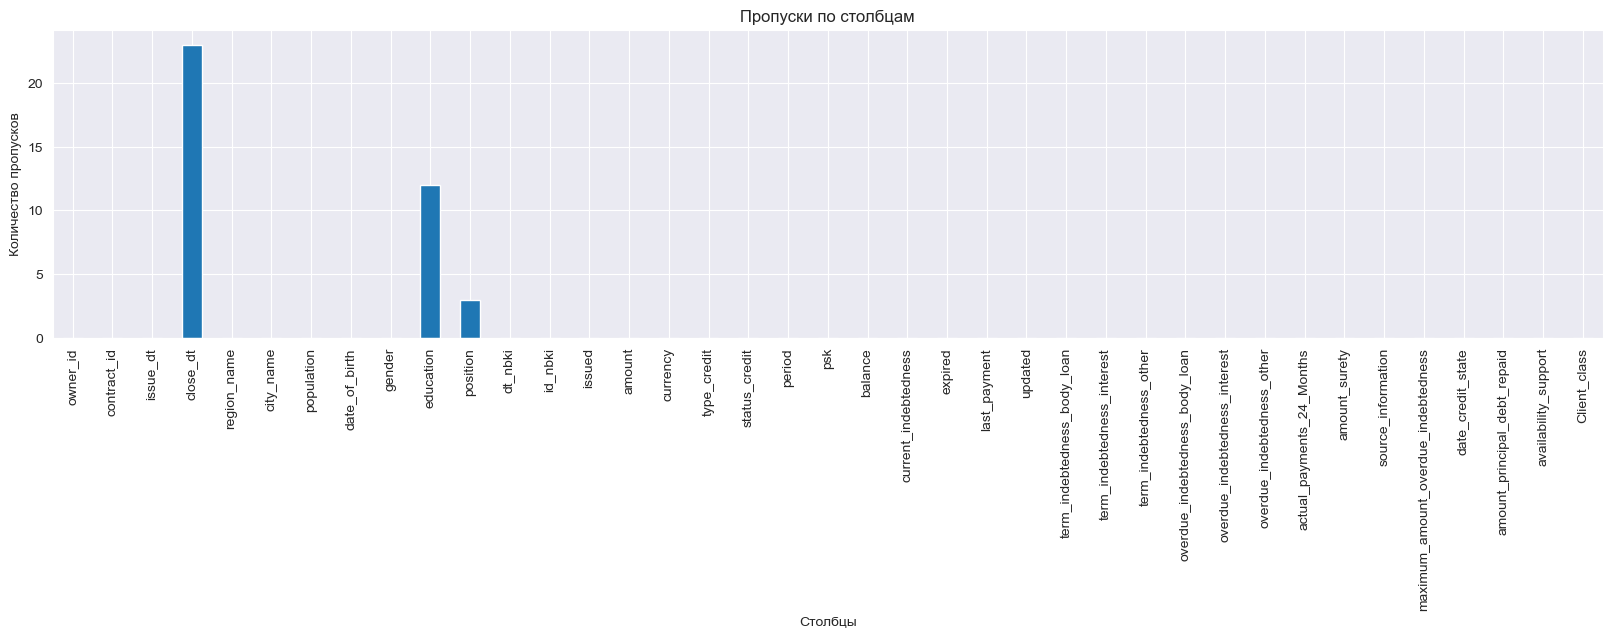

In [27]:
missing_percentages = round(df.isnull().mean() * 100)
print(missing_percentages)

# Отрисовываем график
plt.figure(figsize=(20, 4))
missing_percentages.plot(kind='bar')
plt.title('Пропуски по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.show()

In [39]:
df['Client_class'] = df['Client_class'].replace(2, 1)

In [41]:
df['Client_class'] = df['Client_class'].replace(3, 1)

In [43]:
df['Client_class'].value_counts()

0    1962785
1    1962785
Name: Client_class, dtype: int64

0    1962785
1    1962785
Name: Client_class, dtype: int64


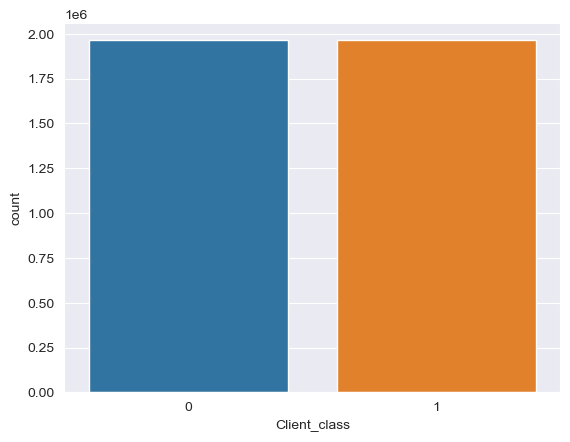

In [44]:
print(df.Client_class.value_counts())
sns.countplot(x=df.Client_class);

## Деление на тест трейн вал

In [46]:
#test
def split(df, name):

  # Получаем уникальные значения из df
  df_unique_len = df['id_nbki'].nunique()
  df_unique = df['id_nbki'].unique()

  # Выбираем 20% случайных значений из df_unique
  df_sample = np.random.choice(df_unique, size=int(0.2*len(df_unique)), replace=False)

  # Фильтруем df по значениям в df_sample
  df_test = df[df['id_nbki'].isin(df_sample)]
  # Фильтруем df по значениям, которых нет в df_sample
  df_train = df[~df['id_nbki'].isin(df_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Test'],
      [name, df_unique_len, df_sample.shape[0], df_train.shape, df_test.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return df_train, df_test


df_train, df_test = split(df, 'df')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Test         |
+-----------+---------------------+-------------------+---------------+--------------+
| df        | 40169               | 8033              | (3155974, 39) | (769596, 39) |
+-----------+---------------------+-------------------+---------------+--------------+



In [29]:
#val
def split1(df, name):

  # Получаем уникальные значения из df
  df_unique_len = df['id_nbki'].nunique()
  df_unique = df['id_nbki'].unique()

  # Выбираем 20% случайных значений из df_unique
  df_sample = np.random.choice(df_unique, size=int(0.2*len(df_unique)), replace=False)

  # Фильтруем df по значениям в df_sample
  df_val = df[df['id_nbki'].isin(df_sample)]
  # Фильтруем df по значениям, которых нет в df_sample
  df_train = df[~df['id_nbki'].isin(df_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Val'],
      [name, df_unique_len, df_sample.shape[0], df_train.shape, df_val.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return df_train, df_val


df_train, df_val = split1(df_train, 'df')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Val          |
+-----------+---------------------+-------------------+---------------+--------------+
| df        | 32136               | 6427              | (2513583, 39) | (623636, 39) |
+-----------+---------------------+-------------------+---------------+--------------+



In [47]:
print(df.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(3925570, 39)
(3155974, 39)
(623636, 39)
(769596, 39)


## Сохранение баз

In [48]:
# сохранение общей базы
df.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_1_2.csv', index=False)

In [49]:
# сохранение train выборки
df_train.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_train_1_2.csv', index=False)

In [50]:
# сохранение val выборки
df_val.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_val_1_2.csv', index=False)

In [51]:
# сохранение test выборки
df_test.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_test_1_2.csv', index=False)